# Importing Modules

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score,f1_score, roc_curve, roc_auc_score
import pickle

# Import the Dataset

In [3]:
df = pd.read_csv('HR_comma_sep.csv')

# Numerical Features

array([[<AxesSubplot:title={'center':'satisfaction_level'}>,
        <AxesSubplot:title={'center':'last_evaluation'}>,
        <AxesSubplot:title={'center':'number_project'}>],
       [<AxesSubplot:title={'center':'average_montly_hours'}>,
        <AxesSubplot:title={'center':'time_spend_company'}>,
        <AxesSubplot:title={'center':'Work_accident'}>],
       [<AxesSubplot:title={'center':'left'}>,
        <AxesSubplot:title={'center':'promotion_last_5years'}>,
        <AxesSubplot:>]], dtype=object)

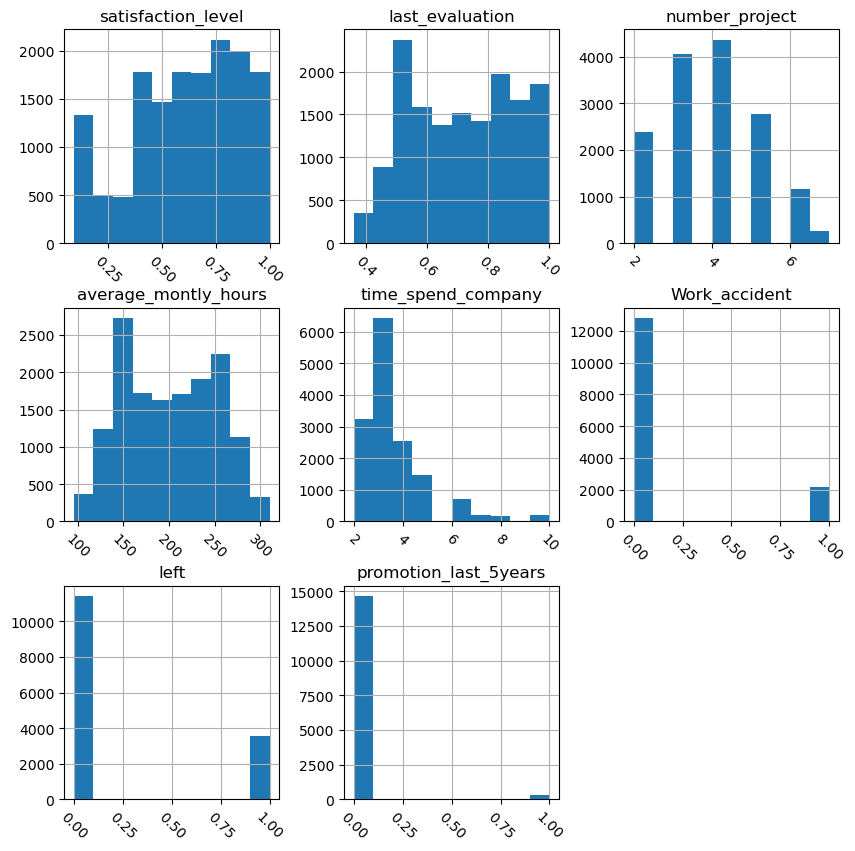

In [4]:
df.hist(figsize=(10,10), xrot=-45)

In [8]:
df.Work_accident.fillna(0, inplace=True)
df.promotion_last_5years.fillna(0, inplace=True)
df['last_evaluation_missing'] = df.last_evaluation.isnull().astype(int)
df.last_evaluation.fillna(0, inplace=True)

# Heat Map

<AxesSubplot:>

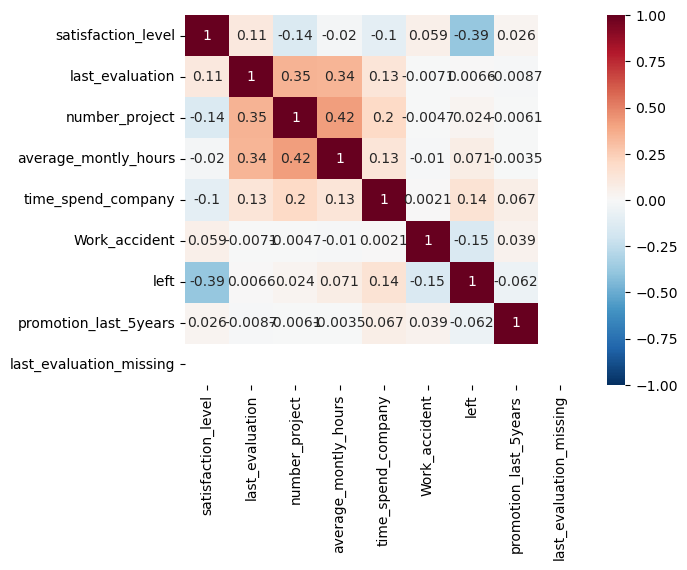

In [10]:
sb.heatmap(df.corr(),annot=True,cmap='RdBu_r',vmin=-1,vmax=1)

# Segmentations

<AxesSubplot:xlabel='satisfaction_level', ylabel='left'>

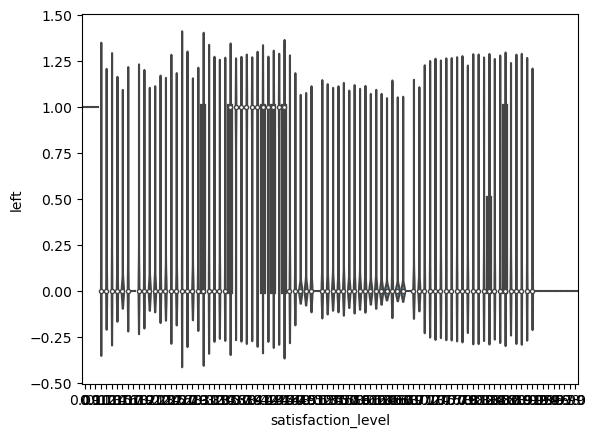

In [49]:
sb.violinplot(y='left', x='satisfaction_level', data=df)

<AxesSubplot:xlabel='last_evaluation', ylabel='left'>

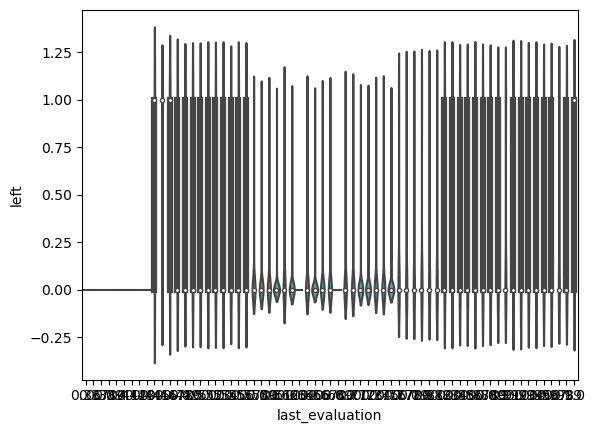

In [50]:
sb.violinplot(y='left', x='last_evaluation', data=df)

<AxesSubplot:xlabel='average_montly_hours', ylabel='left'>

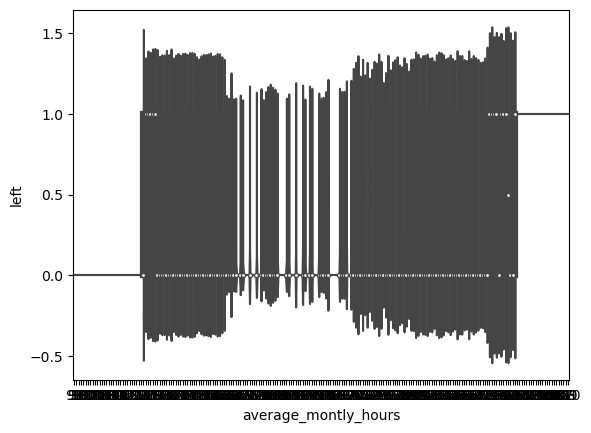

In [51]:
sb.violinplot(y='left', x='average_montly_hours', data=df)

<AxesSubplot:xlabel='number_project', ylabel='left'>

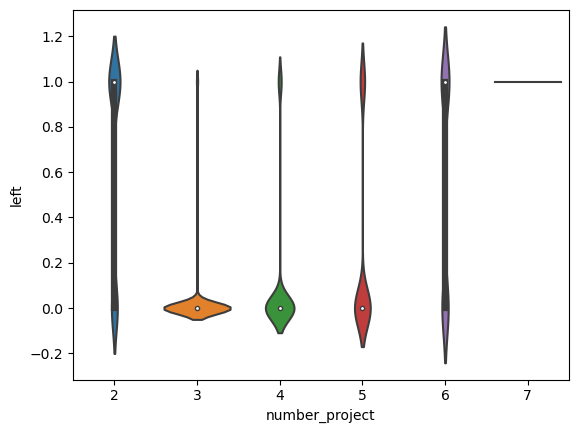

In [52]:
sb.violinplot(y='left', x='number_project', data=df)

# Feature Engineering

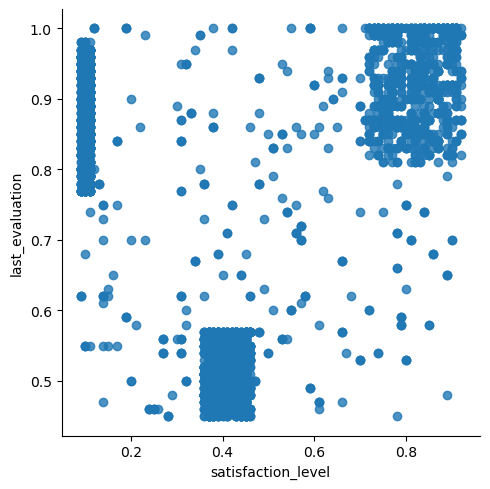

In [53]:
sb.lmplot(x='satisfaction_level',y='last_evaluation',data=df[df.left== 1],fit_reg=False)

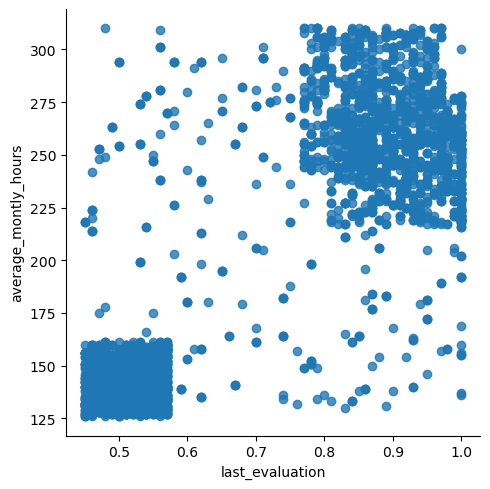

In [55]:
sb.lmplot(x='last_evaluation',
          y='average_montly_hours',
          data=df[df.left== 1],
          fit_reg=False
         )

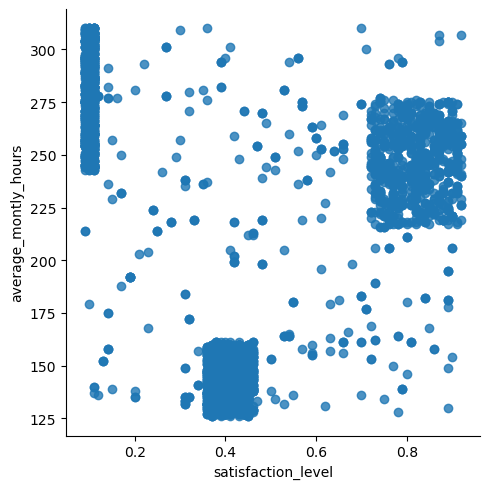

In [56]:
sb.lmplot(x='satisfaction_level',
          y='average_montly_hours',
          data=df[df.left== 1],
          fit_reg=False,
         )


# Modelling

In [58]:
y = df.left
X = df.drop('left', axis=1)

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234, stratify=df.left)

In [72]:
pipelines = {
       'l1': make_pipeline(StandardScaler(), LogisticRegression(penalty='l1', solver='liblinear')),
       'l2': make_pipeline(StandardScaler(), LogisticRegression(penalty='l2', solver='liblinear')),
       'rf': make_pipeline(RandomForestClassifier(random_state=123)),
       'gb': make_pipeline(GradientBoostingClassifier(random_state=123))
            }

In [62]:
l1_hyperparameters = {'logisticregression__C' : [0.001, 0.005, 0.01, 
                       0.05, 0.1, 0.5, 1, 5, 10, 50, 100, 500, 1000]
                     }
l2_hyperparameters = {'logisticregression__C' : 
                       [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 
                        1, 5, 10, 50, 100, 500, 1000]
                     }

In [63]:
rf_hyperparameters = {
    'randomforestclassifier__n_estimators' : [100, 200],
    'randomforestclassifier__max_features' : ['auto', 'sqrt', 0.33],
    'randomforestclassifier__min_samples_leaf' : [1, 3, 5, 10]
    }

In [64]:
gb_hyperparameters = {
    'gradientboostingclassifier__n_estimators' : [100, 200],
    'gradientboostingclassifier__learning_rate' : [0.05, 0.1, 0.2],
    'gradientboostingclassifier__max_depth' : [1, 3, 5]
    }

In [65]:
hyperparameters = {
    'l1' : l1_hyperparameters,
    'l2' : l2_hyperparameters,
    'rf' : rf_hyperparameters,
    'gb' : gb_hyperparameters
    }

In [74]:
fitted_models = {}
for name, pipeline in pipelines.items():
    model = GridSearchCV(pipeline, hyperparameters[name], cv=10, n_jobs=-1)
    model.fit(X_train, y_train)
    fitted_models[name] = model

# Performance

Results for: l1
[[2111  175]
 [ 484  230]]
Accuracy: 0.7803333333333333
Precision: 0.5679012345679012
Recall: 0.32212885154061627
F1: 0.4110813226094727


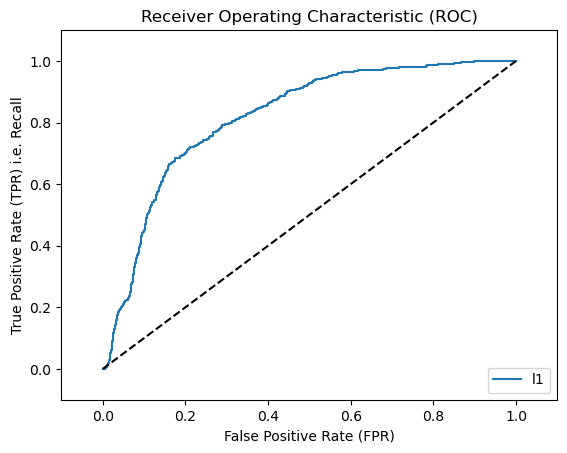

AUROC: 0.8185220719959024
Results for: l2
[[2112  174]
 [ 484  230]]
Accuracy: 0.7806666666666666
Precision: 0.5693069306930693
Recall: 0.32212885154061627
F1: 0.41144901610017887


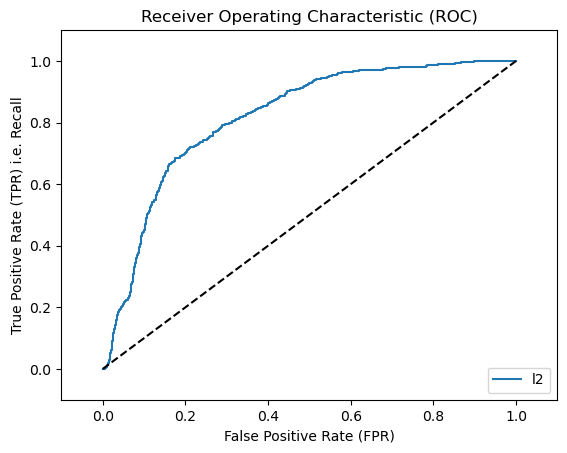

AUROC: 0.8185183959848157
Results for: rf
[[2284    2]
 [  18  696]]
Accuracy: 0.9933333333333333
Precision: 0.997134670487106
Recall: 0.9747899159663865
F1: 0.9858356940509916


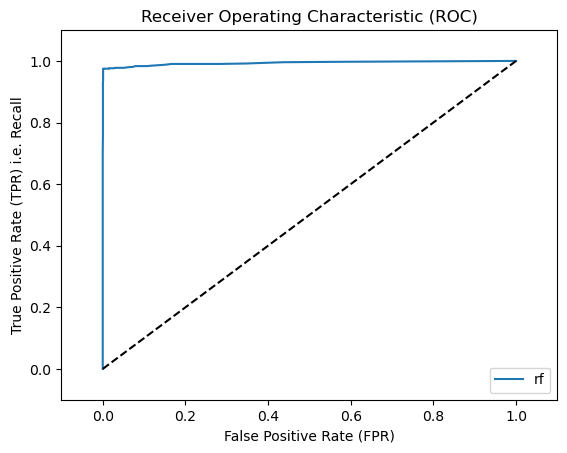

AUROC: 0.9934563939311507
Results for: gb
[[2276   10]
 [  19  695]]
Accuracy: 0.9903333333333333
Precision: 0.9858156028368794
Recall: 0.9733893557422969
F1: 0.9795630725863284


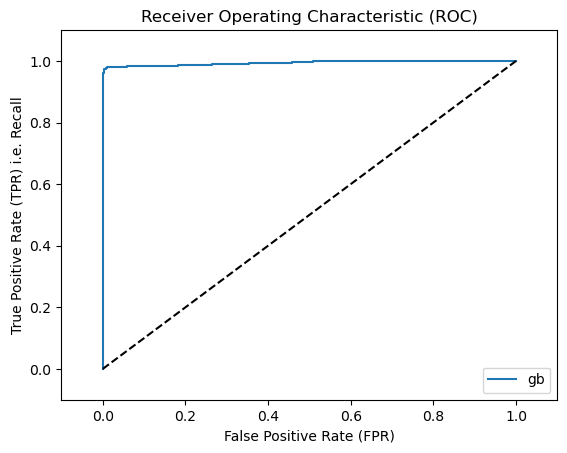

AUROC: 0.99365275419004


In [78]:
for name, model in fitted_models.items():
    print('Results for:', name)
    
    # obtain predictions
    pred = fitted_models[name].predict(X_test)
    # confusion matrix
    cm = confusion_matrix(y_test, pred)
    print(cm)
    # accuracy score
    print('Accuracy:', accuracy_score(y_test, pred))
    
    # precision
    precision = cm[1][1]/(cm[0][1]+cm[1][1])
    print('Precision:', precision)
    
    # recall
    recall = cm[1][1]/(cm[1][0]+cm[1][1])
    print('Recall:', recall)
    
    # F1_score
    print('F1:', f1_score(y_test, pred))
    
    # obtain prediction probabilities
    pred = fitted_models[name].predict_proba(X_test)
    pred = [p[1] for p in pred]
    # plot ROC
    fpr, tpr, thresholds = roc_curve(y_test, pred) 
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.plot(fpr, tpr, label=name)
    plt.legend(loc='lower right')
    plt.plot([0,1],[0,1],'k--')
    plt.xlim([-0.1,1.1])
    plt.ylim([-0.1,1.1])
    plt.ylabel('True Positive Rate (TPR) i.e. Recall')
    plt.xlabel('False Positive Rate (FPR)')
    plt.show()
    
    # AUROC score
    print('AUROC:', roc_auc_score(y_test, pred))